In [30]:
import joblib
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

lucas_1= {
    '0' : 'Artificial',
    '1' : 'Crops',
    '2' : 'Trees',
    '3' : 'Shrubs',
    '4' : 'Grass',
    '5' : 'Bare',
    '6' : 'Water',
    '7' : 'Wetlands',
    'accuracy' : 'Accuracy',
    'macro avg' : 'Macro Average',
    'weighted avg' : 'Weighted Average'
}

reports = joblib.load('/mnt/atlas/datacube_paper/accuracy_reports.joblib')

In [4]:
dfs = []

for exp in list(reports.keys()):
    exp_old = exp
    cval = reports[exp][0]
    cval['validation'] = 'cval'
    cval['Training support'] = cval.support
    test = reports[exp][1]
    test['validation'] = 'test'
    test['Training support'] = cval.support
    
    df = pd.concat([cval,test],axis=0)
    exp = exp.replace("ls","l")
    df['unique'] = exp
    df['DTM'] = True if 'dtm' in exp else False
    
    time_range = None
    if 'small' in exp or 'big' in exp:
        print(exp)
        time_range = '2000-2019'
    else:
        time_range = '2018-2019'
    df['Time range'] = time_range
    
    satellite = None
    if 'l' in exp:
        satellite = 'Landsat'
    if 's' in exp and not 'small' in exp:
        satellite = 'Sentinel-2'
    if 'l' in exp and 's' in exp and not 'small' in exp:
        satellite = "Both"
    if not 'l' in exp and not 's' in exp:
        satellite = 'Both'
    assert satellite is not None, exp
    df['Satellite'] = satellite
    
    resolution = None
    if '30' in exp or satellite == 'Landsat':
        resolution = '30m'
    elif '10' in exp:
        resolution = '10m'
    elif satellite == "Both":
        resolution = 'Both'
    elif satellite == 'Sentinel-2' and not '30' in exp and not '10' in exp:
        resolution = 'Both'
#     if not '10' in exp and not '30' in exp:
#         df['Resolution'] = 'Both'
    assert resolution is not None, exp
    df['Resolution'] = resolution
    
    
    df['lucas'] = df.index.map(lucas_1)
    df['F1-score'] = df['f1-score']
    exp = exp if 'dtm' not in exp else exp[:-4]
    df['exp'] = exp
#     print(exp_old,' -> ',exp)
    dfs.append(df)
    
df = pd.concat(dfs)
print(df.Resolution.value_counts())
print(df.Satellite.value_counts())

l_big
l_big_dtm
l_small
l_small_dtm
30m     220
Both     88
10m      44
Name: Resolution, dtype: int64
Landsat       132
Sentinel-2    132
Both           88
Name: Satellite, dtype: int64


In [5]:
percentiles = 3
quartiles = 4

landsat_layers = 7*quartiles*percentiles
sentinel30m_layers = 6*quartiles*percentiles
sentinel10m_layers = 4*percentiles

df['num_vars'] = 0
df.loc[df.Satellite == 'Landsat','num_vars'] += landsat_layers
df.loc[df.DTM == True,'num_vars'] += 8
df.loc[(df.Satellite == 'Sentinel-2') & (df.Resolution == '30m'),'num_vars'] += sentinel30m_layers
df.loc[(df.Satellite == 'Sentinel-2') & (df.Resolution == '10m'),'num_vars'] += sentinel10m_layers
df.loc[(df.Satellite == 'Both') & (df.Resolution == 'Both'),'num_vars'] += (sentinel30m_layers + sentinel10m_layers + landsat_layers)
df.loc[(df.Satellite == 'Both') & (df.Resolution == '30m'),'num_vars'] += (landsat_layers + sentinel30m_layers)
df.loc[(df.Satellite == 'Sentinel-2') & (df.Resolution == 'Both'),'num_vars'] += (sentinel30m_layers + sentinel10m_layers)
df['Number of variables'] = df.num_vars

84     88
92     88
72     22
80     22
12     22
20     22
156    22
164    22
168    22
176    22
Name: num_vars, dtype: int64

In [6]:

title_base = "Test F1-Score of all 2017-2019 land cover experiments per land cover class and "
dfp = df.drop((df.loc[df.lucas.str.contains('Accuracy|Average')]).index).reset_index()
dfp = dfp.drop((dfp.loc[dfp.exp.str.contains('small|big')]).index)

p = sns.barplot
d = dfp.loc[dfp.validation == 'test']
dir_figs = '/mnt/atlas/datacube_paper/figures'

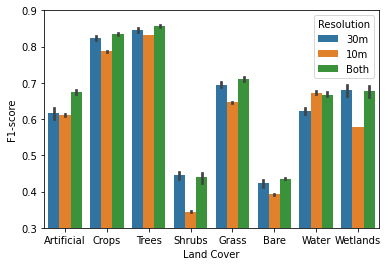

In [20]:
g = sns.barplot(data=d,x='lucas', y='F1-score', hue='Resolution')
g.legend(title='Resolution',loc='upper left',bbox_to_anchor=(0.79,1))
g.set(ylabel='F1-score',xlabel='Land Cover',ylim=[0.3,0.9])
plt.savefig(f"{dir_figs}/fig_results_landcover_experiments_lucas_f1_resolution.pdf",bbox_inches='tight')

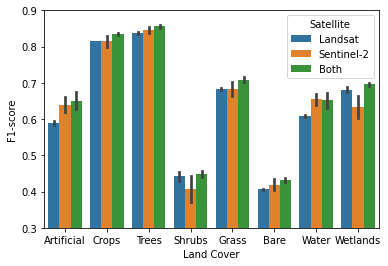

In [21]:
g = sns.barplot(data=d,x='lucas', y='F1-score', hue='Satellite')
g.legend(title='Satellite',loc='upper left',bbox_to_anchor=(0.71,1))
g.set(ylabel='F1-score',xlabel='Land Cover',ylim=[0.3,0.9])
plt.savefig(f"{dir_figs}/fig_results_landcover_experiments_lucas_f1_satellite.pdf",bbox_inches='tight')

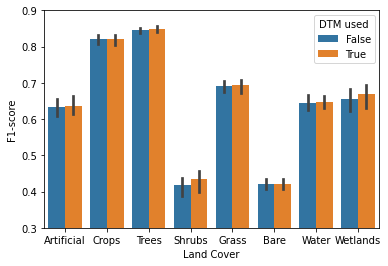

In [22]:
g = sns.barplot(data=d,x='lucas', y='F1-score', hue='DTM')
g.legend(title='DTM used',loc='upper left',bbox_to_anchor=(0.79,1))
g.set(ylabel='F1-score',xlabel='Land Cover',ylim=[0.3,0.9])
plt.savefig(f"{dir_figs}/fig_results_landcover_experiments_lucas_f1_dtm.pdf",bbox_inches='tight')